In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import imutils

In [2]:
# Load the image
image_original = cv2.imread("1.jpg")

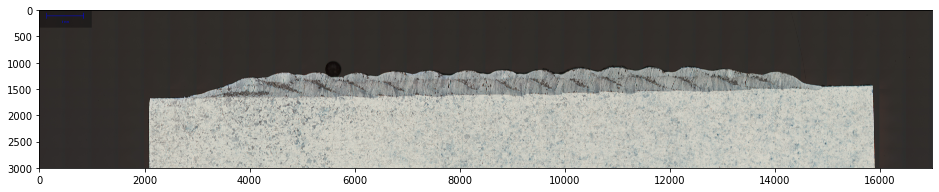

In [3]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.imshow(image_original)

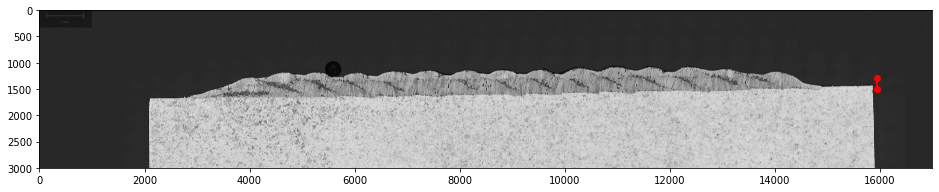

In [4]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([15950, 15950], [1300, 1500], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image, cmap='gray')

In [5]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 15820, 15950
y_start, y_end = 1400, 1500

selected_portion = image[y_start:y_end, x_start:x_end]

In [6]:
np.set_printoptions(threshold=np.inf)
print(selected_portion)
selected_portion.size
np.prod(selected_portion.shape)

[[ 45  45  45  46  46  46  46  46  46  45  45  45  45  46  46  46  46  46
   45  45  45  46  46  46  46  46  46  46  45  45  46  46  46  46  46  46
   47  47  46  46  45  45  45  45  46  46  46  46  46  46  46  46  46  46
   46  46  46  46  46  46  46  45  46  46  46  44  44  46  46  46  46  46
   46  46  46  46  45  45  45  46  46  46  46  46  45  46  48  47  46  45
   45  45  47  46  46  46  46  45  45  45  46  46  46  46  47  46  45  44
   45  45  45  45  45  45  45  45  46  46  45  45  45  45  46  46  45  46
   46  46  46  46]
 [ 45  46  46  46  46  46  46  46  46  46  45  45  45  45  46  46  46  46
   45  45  46  46  46  46  46  46  46  46  46  46  46  46  46  46  46  46
   47  46  46  46  46  45  45  45  46  46  46  46  46  46  46  46  46  46
   46  46  46  46  46  46  46  45  46  46  46  44  44  46  46  46  46  46
   46  46  46  46  46  46  46  46  46  46  46  46  44  45  47  47  46  45
   46  46  46  46  46  46  46  46  46  46  45  45  45  46  46  47  46  46
   45  45  45  45  

13000

In [8]:
# Example threshold value
threshold = 105

# Assume selected_portion is your 2D array filled with zeros

# Create a new array with the same shape as selected_portion
new_array_2d = np.zeros_like(selected_portion)

# Iterate through the 2D array
for i in range(selected_portion.shape[0]):
    for j in range(5, selected_portion.shape[1]):  # Start from index 5 to ensure we have enough space to check 5 values before
        if selected_portion[i, j] < threshold and any(selected_portion[i, j-5:j] > threshold):
            new_array_2d[i, j] = selected_portion[i, j]

print(new_array_2d)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  

In [9]:
# Example threshold value
threshold = 105

# Assume selected_portion is your 2D array filled with zeros

# Create a new array with the same shape as selected_portion
new_array_2d = np.zeros_like(selected_portion)

# Initialize a list to store the coordinates of the fifth value more than the threshold
coordinates_fifth_value = []

# Iterate through the 2D array
for i in range(selected_portion.shape[0]):
    for j in range(5, selected_portion.shape[1]):  # Start from index 5 to ensure we have enough space to check 5 values before
        if selected_portion[i, j] < threshold and any(selected_portion[i, j-5:j] > threshold):
            new_array_2d[i, j] = selected_portion[i, j]
            coordinates_fifth_value.append((i, j))

print("New Array:")
print(new_array_2d)
print("Coordinates of Fifth Value more than Threshold:")
print(coordinates_fifth_value)


New Array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   

In [ ]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 15820, 15950
y_start, y_end = 1400, -1
threshold = 105

selected_portion = image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []



In [12]:
threshold = 105
first_values = []
coordinates = []

for y, row in enumerate(selected_portion):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

print(first_values) #print 1 

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]



num_first_values = len(first_values)
print(num_first_values) #print 2

num_selected_values = len(selected_portion)
print(num_selected_values) #print 3

num_coordinates_count = len(coordinates)
print(num_coordinates_count) #print 4
print(coordinates)


[None, None, None, 125, 109, 157, 144, 163, 137, 176, 156, 145, 110, 144, 165, 161, 166, 177, 171, 160]
20
20
17
[(6, 3), (5, 4), (5, 5), (4, 6), (4, 7), (3, 8), (3, 9), (2, 10), (2, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19)]


1 First Values: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

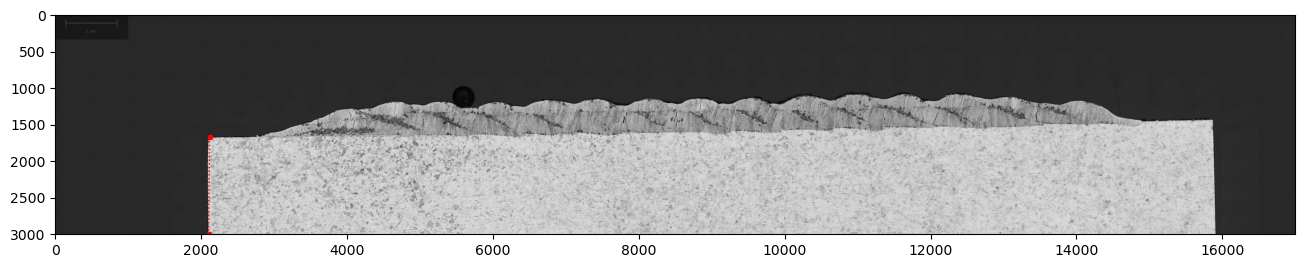

In [13]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2050, 2200
y_start, y_end = 1500, -1
threshold = 105

selected_portions= image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for y, row in enumerate(selected_portions):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 First Values:", first_values)

print("2 Coordinates:", coordinates)

num_first_values = len(first_values)
print("3 First Values Number Count:", num_first_values)

num_coordinates_count = len(coordinates)
print("4 Coordinates Number Count:", num_coordinates_count)

print("5 X Global Value:", first_values_x_global)

print("6 Y Global Value:", first_values_y_global)

print("7 Global Value:", global_coordinates)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')

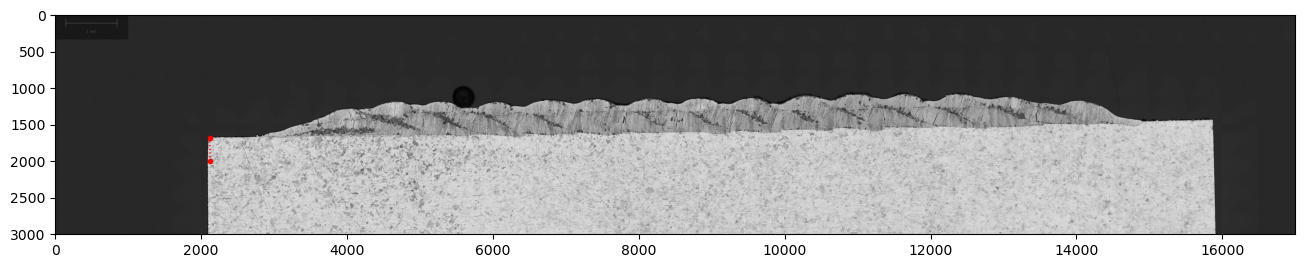

In [20]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2120, 2121
y_start, y_end = 1675, 1990

selected_portion1 = image[y_start:y_end, x_start:x_end]
selected_portion2 = image[y_start:y_end, x_start:x_end]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([x_start, x_end], [y_start, y_end], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')

In [16]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

bottom_image = image == 38

cols =[1,-1]

start = np.where(bottom_image[:,cols[0]] == True)[0][0]
end = np.where(bottom_image[:,cols[1]] == True)[0][0]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([cols[0], 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image_original, cmap='gray')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [89]:
bottom_image.shape[1]

3565

In [91]:
arr = []

for i in range(bottom_image.shape[1]):
    arr.append(np.where(bottom_image[:,i] == True)[0][0])

In [90]:
arr1 = []

for i in range(bottom_image.shape[0]):
    arr.append(np.where(bottom_image[:,i] == True)[0][0])

In [36]:
range(len(bottom_image.shape[1]))

TypeError: object of type 'int' has no len()

In [75]:
arr

[1196,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1087,
 1087,
 1087,
 1087,
 1087,
 1087,
 1086,
 1086,
 1086,
 1086,
 1086,
 1086,
 1085,
 1085,
 1085,
 1085,
 1085,
 1085,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,

In [61]:
np.min(arr), np.max(arr)

(1002, 1196)

In [60]:
np.mean(arr)

1046.6165497896213

In [47]:
top_values = []

for i,j in zip(range(bottom_image.shape[1]), arr):
    top_values.append([i,j])

In [93]:
top_values

[[0, 1196],
 [1, 1091],
 [2, 1091],
 [3, 1091],
 [4, 1091],
 [5, 1091],
 [6, 1091],
 [7, 1091],
 [8, 1091],
 [9, 1091],
 [10, 1091],
 [11, 1091],
 [12, 1091],
 [13, 1091],
 [14, 1091],
 [15, 1091],
 [16, 1091],
 [17, 1091],
 [18, 1091],
 [19, 1091],
 [20, 1091],
 [21, 1091],
 [22, 1091],
 [23, 1091],
 [24, 1091],
 [25, 1091],
 [26, 1091],
 [27, 1091],
 [28, 1091],
 [29, 1091],
 [30, 1091],
 [31, 1091],
 [32, 1091],
 [33, 1091],
 [34, 1091],
 [35, 1091],
 [36, 1091],
 [37, 1091],
 [38, 1091],
 [39, 1091],
 [40, 1091],
 [41, 1091],
 [42, 1091],
 [43, 1090],
 [44, 1090],
 [45, 1090],
 [46, 1090],
 [47, 1090],
 [48, 1090],
 [49, 1090],
 [50, 1090],
 [51, 1090],
 [52, 1090],
 [53, 1090],
 [54, 1089],
 [55, 1089],
 [56, 1089],
 [57, 1089],
 [58, 1089],
 [59, 1089],
 [60, 1089],
 [61, 1089],
 [62, 1089],
 [63, 1088],
 [64, 1088],
 [65, 1088],
 [66, 1088],
 [67, 1088],
 [68, 1088],
 [69, 1088],
 [70, 1087],
 [71, 1087],
 [72, 1087],
 [73, 1087],
 [74, 1087],
 [75, 1087],
 [76, 1086],
 [77, 108

In [111]:
top_values1 = np.array([subarray[0] for subarray in top_values], dtype=np.float64)
top_values2 = np.array([subarray[1] for subarray in top_values], dtype=np.float64)
print(top_values1)


[0.000e+00 1.000e+00 2.000e+00 ... 3.562e+03 3.563e+03 3.564e+03]


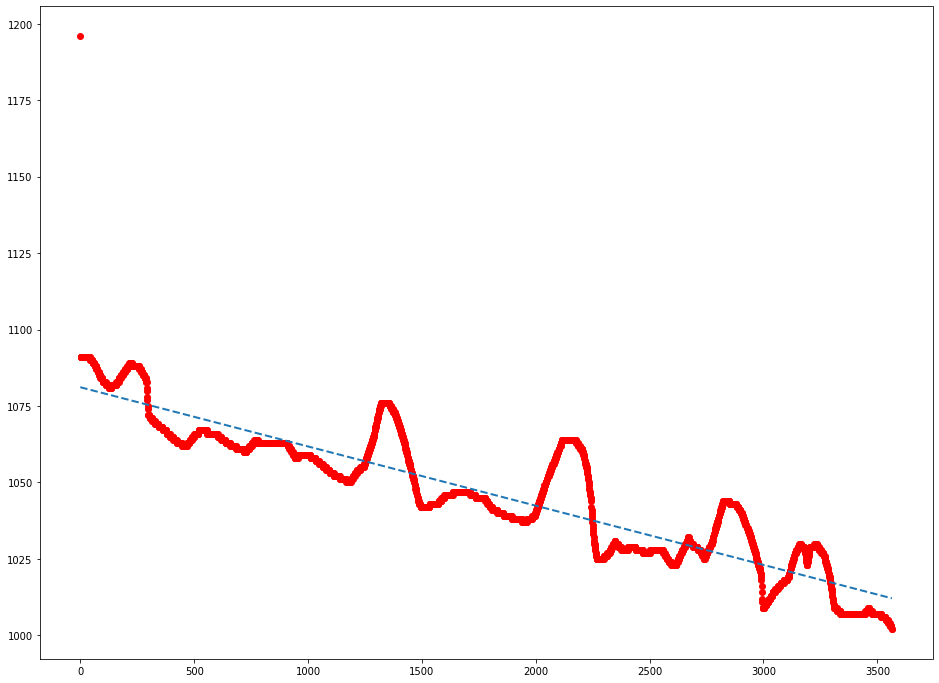

In [140]:
fig = plt.figure(figsize=(16, 12))
a, b = np.polyfit(top_values1, top_values2, 1)
#plt.plot([c], marker='o', linestyle='-', linewidth=1, color='red')
plt.scatter(top_values1, top_values2, color='red')
a1 = top_values1
a2 = a*top_values1+b
plt.plot(a1, a2, linestyle='--', linewidth=2)
#plt.plot(top_values1, a*top_values1+b)
#plt.imshow(image, cmap='gray')

In [146]:
first_value = a2[0]
last_value = a2[-1]
print(first_value, last_value)

1081.1459497089152 1012.0871498703273


In [147]:
x1, y1 = 0, 1081
x2, y2 = 3564, 1012

In [150]:
angle_radius = math.atan2(y2 - y1, x2 - x1)
angle_degree = math.degrees(angle_radius)

In [151]:
print(angle_radius, angle_degree)

-0.01935785103186327 -1.1091231645687312


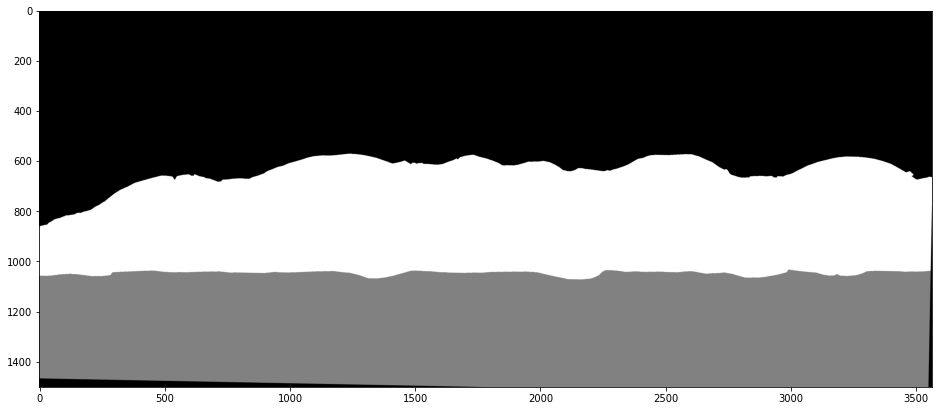

In [158]:
fig = plt.figure(figsize=(16, 12))
degree_rotate = -1.1091231645687312
rotated_image = imutils.rotate(image, angle= degree_rotate)
plt.imshow(rotated_image, cmap='gray')

In [58]:
image[:,0]

array([ 0,  0,  0, ..., 38, 38, 38], dtype=uint8)

In [71]:
# [1046]*bottom_image.shape[0]

In [80]:
arr

[1196,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1087,
 1087,
 1087,
 1087,
 1087,
 1087,
 1086,
 1086,
 1086,
 1086,
 1086,
 1086,
 1085,
 1085,
 1085,
 1085,
 1085,
 1085,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,

In [81]:
np.argmin(arr)

3563

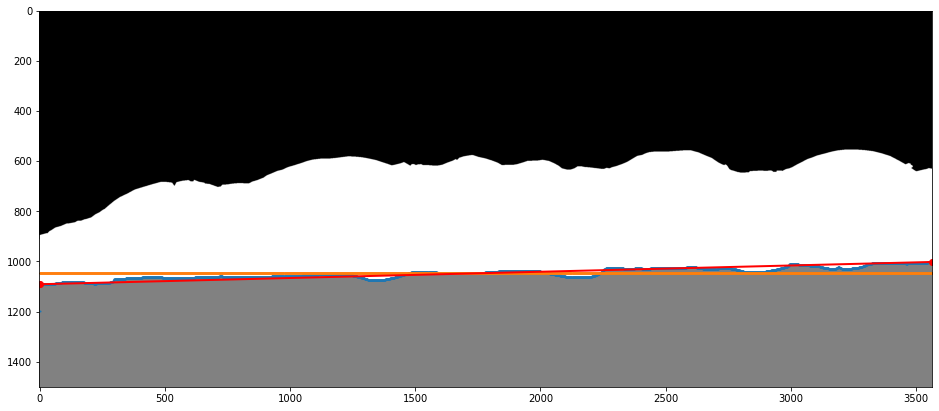

In [127]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([cols[0], 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.scatter(range(bottom_image.shape[1]), arr, s=1)
plt.scatter(range(bottom_image.shape[1]), [1046]*(bottom_image.shape[1]), s=1)
plt.imshow(image, cmap='gray')

In [87]:
bottom_image[1,-1]

False

In [88]:
b=np.where(bottom_image==True)

In [90]:
np.argmin(b[1])
b[0][np.argmin(b[1])]

1196

In [80]:
np.where(bottom_image[:,cols[1]] == True)

(array([1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045,
        1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056,
        1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067,
        1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078,
        1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089,
        1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100,
        1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111,
        1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
        1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
        1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
        1145, 1146, 1147, 1148, 1149, 

In [81]:
np.arange(bottom_image.shape[1])

array([   0,    1,    2, ..., 3562, 3563, 3564])

In [82]:
np.arange(bottom_image.shape[0])

array([   0,    1,    2, ..., 1498, 1499, 1500])

In [6]:
np.unique(image)

array([ 0, 38, 75], dtype=uint8)

In [7]:
image.shape

(1501, 3565)

In [8]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

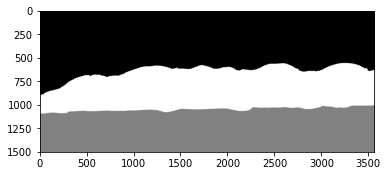

In [9]:
plt.imshow(image, cmap='gray')

In [23]:
tick_params(labeltop=True, labelright=True)

NameError: name 'tick_params' is not defined

In [10]:
image.shape

(1501, 3565)

In [11]:
np.unique(image)

array([ 0, 38, 75], dtype=uint8)

In [12]:
image.shape

(1501, 3565)

In [13]:
image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38]], dtype=uint8)

In [14]:
image_bottom = image[image == 75]

In [15]:
image_bottom.shape

(1464927,)

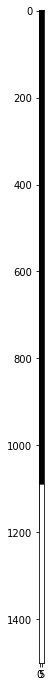

In [16]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.imshow((image == 38)[:,:10], cmap='gray')

In [21]:
bottom_image = image == 38

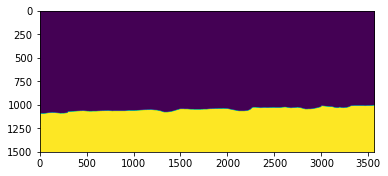

In [22]:
plt.imshow(bottom_image)

In [40]:
np.where(bottom_image[:,1] == True)

(array([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
        1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112,
        1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123,
        1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134,
        1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
        1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156,
        1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167,
        1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178,
        1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189,
        1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200,
        1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211,
        1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222,
        1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233,
        1234, 1235, 1236, 1237, 1238, 

In [49]:
np.where(bottom_image[1:,:] == True)

(array([1001, 1001, 1002, ..., 1499, 1499, 1499], dtype=int64),
 array([3563, 3564, 3555, ..., 3562, 3563, 3564], dtype=int64))

In [ ]:
np.where(bottom_image[1:,:] == True)

(array([1001, 1001, 1002, ..., 1499, 1499, 1499], dtype=int64),
 array([3563, 3564, 3555, ..., 3562, 3563, 3564], dtype=int64))

In [ ]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

bottom_image = image == 38

start = np.where(bottom_image[:,1] == True)[0][0]
end = np.where(bottom_image[:,-1] == True)[0][0]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([0, 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image_original, cmap='gray')